
<center><h1><b>Project 3: Capital BikeShare Data Analysis</b></h1></center>

<b>Collaborators :</b>
- Lakshmi Kavya Ravi (OE37135)
- Omkar Katkade (DX68372)
- Venkata Praneeth Donaparthi (ZI46450)


# **Datasets Used :**

1.   BikeShare Data
    - Source : https://www.capitalbikeshare.com/system-data
    - Shape of Dataset : (3542684, 7)
            *    Duration – Duration of trip
            *    Start Date – Includes start date and time
            *    End Date – Includes end date and time
            *    Start Station – Includes starting station name and number
            *    End Station – Includes ending station name and number
            *    Bike Number – Includes ID number of bike used for the trip
            *    Member Type – Indicates whether user was a "registered" member  or a "casual" rider 

2.   Weather Data
    - Source : https://www.wunderground.com/history
    - Shape of Dataset : (365, 17)
            *   Day - Each day in the year 2018
            *   Temperature - Average, Min and Max Temp on a day
            *   Wind Speed - Average, Min and Max Wind Speed on a day
            *   Humidity - Average, Min and Max Humidity on a day
            *   Pressure - Average, Min and Max Pressure on a day
            *   Percepitation - Average, Min and Max Percepitation on a day


3. Capital Share's Station Info Data
  - Source: https://gbfs.capitalbikeshare.com/gbfs/gbfs.json
  - Shape of Dataset: (667, 4)
          *  Station Name - Start and End Station Name  
          *  Station ID - Start and End Station Number
          *  Station Latitude and Longitude - Start and End Station Latitude and Longitude.



**Workflow :**


*   Step 0: Data Gathering and Exploration
*   Step 1: Data Manipulation
*   Step 2:
    *   Hypothesis Testing
    *   Data Visualization
*   Step 3: Data Modeling




In [1]:
# Install the required and non-unique packages
!pip install openrouteservice

# Import the required libraries into project
import pandas as pd
from pandas import json_normalize
import requests
import numpy as np
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

     |████████████████████████████████| 9.7 MB 22.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.0 MB 31.6 MB/s 
     |████████████████████████████████| 6.3 MB 42.5 MB/s 
     |████████████████████████████████| 15.4 MB 43.8 MB/s 
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=17922343 sha256=d4b2c38bd07c2e7ced8715282ec91d53b9a17639530d219a8461ca322772bd60
  Stored in directory: /root/.cache/pip/wheels/4b/19/e5/0852b7888ee350e9c57087ccc61eeab9daf50f5caac9c690ec
Successfully built keplergl


# **DATA GATHERING**

In [2]:
'''
Weather Data is stored in a single file. First URL represents Weather Data.
Data for 2018 BikeShare's rides is stored in five different files
Below list contains url for each of those files
'''

url_list = ['https://drive.google.com/file/d/14-iu4-GL3an36zztikt6hmAAC-Uaj5L7/view?usp=sharing', # Weather Dataset for 2018
            'https://drive.google.com/file/d/13YgsyEZ-3xG90q4vOg2vMZIP7ZTuVS59/view?usp=sharing', # Capital BikeShare Dataset 2018 start
            'https://drive.google.com/file/d/1sz09752OovoO-SS_pKg_k5nBTsXOXrHr/view?usp=sharing',
            'https://drive.google.com/file/d/1NLrRH8YXU3S5VdBZ_1Qe2_KRsHRnbTCq/view?usp=sharing',
            'https://drive.google.com/file/d/1ema9nFniiMKJoq42Oyk9ob6SCh43dSV4/view?usp=sharing',
            'https://drive.google.com/file/d/1WcwNqaQCm3psqJt8x4VNnB0jdGaYe59U/view?usp=sharing'] # Capital BikeShare Dataset 2018 end

bikeShare_2018 = pd.DataFrame()                                                 # DataFrame to hold the entire Capital BikeShare data
weather_2018 = pd.DataFrame()                                                   # DataFrame to hold the Weather data for 2018
first = True

for url in url_list:
  file_id = url.split('/')[-2]                                                  # Getting the document id
  dwn_url = 'https://drive.google.com/uc?export=download&id=' + file_id         # Creating the download URL
  url = requests.get(dwn_url).text
  csv_raw = StringIO(url)
  data = pd.read_csv(csv_raw, error_bad_lines = False)                          # Loading the dataset into dataframe

  if first:                
    weather_2018 = weather_2018.append(data)                                    # Appending data to weather data frame                            
    first = False
  else:
    bikeShare_2018 = bikeShare_2018.append(data)                                # Appending data to bikeShare data frame for all files   



In [3]:
    # Making dimensions/overview of the dataset visible.
    print("OVERVIEW Of Capital BikeShare 2018 Data:")
    print("Number of Features: " + str(len(bikeShare_2018.columns)))
    print("Number of Records: " + str(len(bikeShare_2018.index)))
    print("Number of Duplicate Records: " + str(len(bikeShare_2018)-len(bikeShare_2018.drop_duplicates())))
    print("Total number of missing cells in entire DataFrame: " + str(bikeShare_2018.isnull().sum().sum()))
    print("Size "+ str(round(bikeShare_2018.memory_usage(index=True).sum() * 0.00000095367432, 2)) + " MiB")

OVERVIEW Of Capital BikeShare 2018 Data:
Number of Features: 9
Number of Records: 3542684
Number of Duplicate Records: 18441
Total number of missing cells in entire DataFrame: 0
Size 270.29 MiB


## **Exploring Capital BikeShare 2018 Data**





In [4]:
bikeShare_2018

Duration        Start date  ... Bike number  Member type
0            552     1/1/2018 0:05  ...      W00886       Member
1           1282     1/1/2018 0:14  ...      W01435       Casual
2           1265     1/1/2018 0:14  ...      W21242       Casual
3            578     1/1/2018 0:15  ...      W21322       Casual
4            372     1/1/2018 0:18  ...      W00119       Member
...          ...               ...  ...         ...          ...
158848      3313  12/31/2018 23:37  ...      W00159       Member
158849       888  12/31/2018 23:42  ...      W22026       Member
158850      2332  12/31/2018 23:44  ...      W23900       Member
158851       307  12/31/2018 23:52  ...      W00761       Member
158852      1062  12/31/2018 23:54  ...      W21324       Member

[3542684 rows x 9 columns]

# **Exploring 2018's Weather Data**

In [5]:
weather_2018 

Day  Temp Max(° F)  ...  Pressure (Hg) Min  Precipitation (in) Total
0     1-Jan             24  ...               30.4                      0.00
1     2-Jan             26  ...               30.4                      0.00
2     3-Jan             35  ...               29.9                      0.00
3     4-Jan             27  ...               29.6                      0.09
4     5-Jan             21  ...               29.9                      0.00
..      ...            ...  ...                ...                       ...
360  27-Dec             52  ...               30.3                      0.00
361  28-Dec             57  ...               29.8                      0.47
362  29-Dec             57  ...               29.9                      0.56
363  30-Dec             47  ...               30.2                      0.00
364  31-Dec             51  ...               29.8                      0.00

[365 rows x 17 columns]

# **Exploring Capital Share's Real-time station info Data**

In [6]:
''' This code block will fetch a new dataset from Capital Share's website which holds real-time station information.
    We are using this to get latitude and longitude information of all stations in the dataset'''
 
url = 'https://gbfs.capitalbikeshare.com/gbfs/es/station_information.json'      # URL to Capital Share's Real-Time Station dataset
response = requests.get(url)                                                    # Get Request
dictr = response.json()                                                         # Fetching JSON data into a dictionary 
recs = dictr['data']['stations']                                                # Selecting only required data  
station_info = json_normalize(recs)                                             # Getting into pandas dataframe
station_info = station_info[['name','station_id','lat', 'lon']]                 # Retaining only required data further
station_info

name  ...        lon
0                             Eads St & 15th St S  ... -77.053230
1                          Crystal Dr & 20th St S  ... -77.049232
2                          Crystal Dr & 15th St S  ... -77.049417
3    Aurora Hills Cmty Ctr / 18th St & S Hayes St  ... -77.059490
4      Pentagon City Metro / 12th St & S Hayes St  ... -77.059936
..                                            ...  ...        ...
662                               Reed and Edison  ... -77.060899
663                         King St & Kenwood Ave  ... -77.085066
664                   S Washington St & Wilkes St  ... -77.048043
665                      Main Line Blvd & E Glebe  ... -77.049772
666                         Commonwealth and Reed  ... -77.057274

[667 rows x 4 columns]

# **DATA MANIPULATION**
As we saw in the data exploration stage, our data is clean and tidy and does not need additional cleaning or tidying. However, we need to extract few features from existing featuers and manipulate data that is required for our analysis.

Features that are to be extracted from the data:
1. Time of the Day (Morning, Mid-Day, Afternoon, Night, etc.)
2. Day of the ride ( Day of the week. For eg, Mon, Tue, etc.)
3. Day of the ride ( Weekday/ Weekend)
4. Month of the ride
5. Season of the ride (Spring, Summer, Fall, Winter)
6. Duration in categories (Less than 1hr, 2+, etc)

In [7]:
bikeShare_2018['Start date'] =  pd.to_datetime(bikeShare_2018['Start date'], infer_datetime_format=True)    # infer_datetime_format is set to True to reduce time consumption

bikeShare_2018['End date']   =  pd.to_datetime(bikeShare_2018['End date'], infer_datetime_format=True)      # infer_datetime_format is set to True to reduce time consumption


In [8]:
# Extract the new feature 'Timeperiod' from the date fields based on hour of the day

bikeShare_2018['Start Timeperiod'] = pd.cut(bikeShare_2018['Start date'].dt.hour,
                                            bins = [-1,6,10,14,17,20,23],
                                            labels = ['Mid Night','Early Morning','Noon','Mid-day','Evening', 'Night']) 

bikeShare_2018['End Timeperiod'] = pd.cut(bikeShare_2018['End date'].dt.hour,
                                          bins = [-1,6,10,14,17,20,23],
                                          labels = ['Mid Night','Early Morning','Noon','Mid-day','Evening', 'Night'])



In [9]:
# Extract the weekday from the date

bikeShare_2018['Start Day'] = bikeShare_2018['Start date'].dt.day_name()
bikeShare_2018['Start Day'] = pd.Categorical(bikeShare_2018['Start Day'], [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

bikeShare_2018['End Day'] = bikeShare_2018['End date'].dt.day_name()
bikeShare_2018['End Day'] = pd.Categorical(bikeShare_2018['End Day'], [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])


In [10]:
# Check if the day is weekday or weekend
bikeShare_2018['Weekend/WeekDay'] = np.where(bikeShare_2018['Start date'].dt.dayofweek // 5 == 1, 'Weekend', 'Weekday')
    

In [11]:
# Extract Month from the date


bikeShare_2018['Start Month'] = bikeShare_2018['Start date'].dt.month_name()
bikeShare_2018['Start Month'] = pd.Categorical(bikeShare_2018['Start Month'], ["January","February","March","April","May","June","July", "August","September","October","November","December"])

bikeShare_2018['End Month'] = bikeShare_2018['End date'].dt.month_name()
bikeShare_2018['End Month'] = pd.Categorical(bikeShare_2018['End Month'], ["January","February","March","April","May","June","July", "August","September","October","November","December"])


In [12]:
conditions = [
              ( bikeShare_2018['Start date'].dt.month % 12 // 3 + 1 == 1 ),
              ( bikeShare_2018['Start date'].dt.month % 12 // 3 + 1 == 2 ),
              ( bikeShare_2018['Start date'].dt.month % 12 // 3 + 1 == 3 ),
              ( bikeShare_2018['Start date'].dt.month % 12 // 3 + 1 == 4 )
             ]

values = ['Q1', 'Q2', 'Q3', 'Q4']
bikeShare_2018['Ride Quarter'] = np.select(conditions, values)   #  Add bins and create conditions to segregate into bins

In [13]:
# Categorise the date into seasons based on the month of the date 
bikeShare_2018['Season'] = pd.cut( bikeShare_2018['Start date'].dt.month,
                                    bins = [-1,2,5,8,11,12],
                                    labels = [ 'Winter', 'Spring', 'Summer', 'Fall', 'Winter'],
                                    ordered = False)



In [14]:
bikeShare_2018['duration'] = ( bikeShare_2018['End date'] - bikeShare_2018['Start date'] ).astype('timedelta64[h]') # Extract the duration in hours
bikeShare_2018['Duration(hrs)'] = pd.cut(bikeShare_2018['duration'],
                                               [-1,1,2,4,6,10,12,16,20,100000],
                                               labels = ["less than 1","1+","2+","4+","6+","10+","12+","16+","20+"]) # Segregate the duration into bins

bikeShare_2018.drop(['duration'], axis = 1, inplace = True) # drop the regression values of duration 



---



# **QUESTIONS:**

Is there any relation between the day of the week and month to the count and duration of the rides?


In [15]:
daywise_df = (bikeShare_2018.groupby(['Start Day','Member type']).size().to_frame().reset_index())  # Count the number of rides taken based on day and member-type.
daywise_df.columns = ["Start Day","Member type","Count"]  # Name the columns

monthwise_df = (bikeShare_2018.groupby(['Start Month','Member type']).size().to_frame().reset_index()) # Count the number of rides taken based on month and member-type.
monthwise_df.columns = ["Start Month","Member type","Count"]  # Name the columns



daywise_df_mean = bikeShare_2018.groupby(['Start Day','Member type']).mean().reset_index() # reset the index

monthwise_df_mean = bikeShare_2018.groupby(['Start Month','Member type']).mean().reset_index() # reset the index


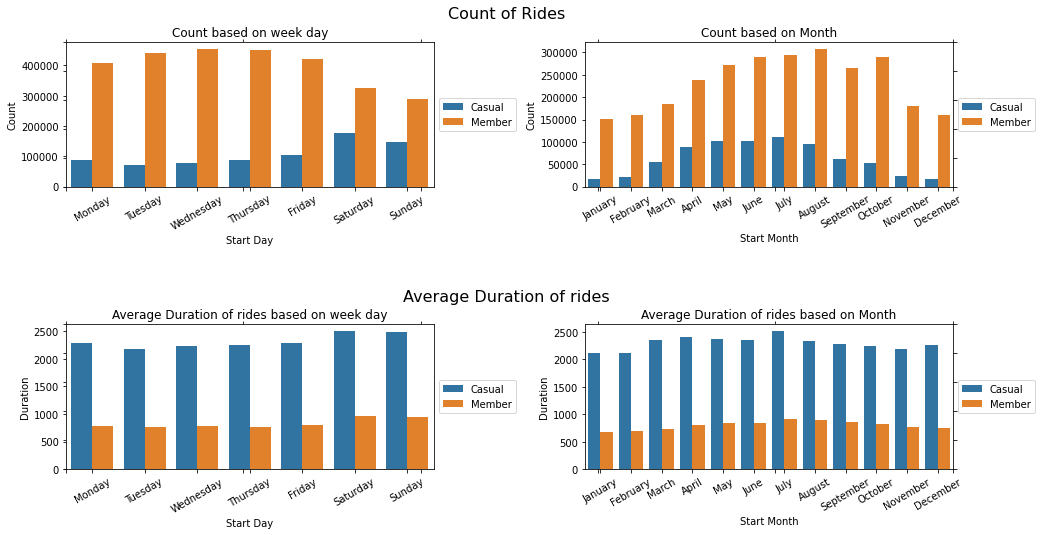

In [16]:
fig, big_axes = plt.subplots( figsize=(15, 8) , nrows=2, ncols=1, sharey=True) # create a 2 * 1 subplots (later two plots in each of the subplot)

row_titles = ["Count of Rides \n ","Average Duration of rides \n"] # name the two sets of rows.

for row, big_ax in enumerate(big_axes, start=1):    # Loop the two rows and add subplots for each set.
    big_ax.set_title(row_titles[row -1], fontsize=16) # title each subplot sets.
    # Turn off axis lines and ticks of the big subplot 
    # obs alpha is 0 in RGBA string!
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False


# Create subplot for Day vs Count for each member type.
ax_1 = fig.add_subplot(2,2,1) # plot (0,0) 
ax_1.set_title("Count based on week day")
sns.barplot( ax =ax_1, x="Start Day", y="Count", hue="Member type", data = daywise_df); 
ax_1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax_1.set_xticklabels(ax_1.get_xticklabels(),rotation = 30)

# Create subplot for Month vs Count for each member type.
ax_2 = fig.add_subplot(2,2,2)
ax_2.set_title("Count based on Month")
sns.barplot( ax =ax_2, x="Start Month", y="Count", hue="Member type", data=monthwise_df);
ax_2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax_2.set_xticklabels(ax_2.get_xticklabels(),rotation = 30)

# Create subplot for Average Duration vs Day for each member type.
ax_3 = fig.add_subplot(2,2,3)
ax_3.set_title("Average Duration of rides based on week day")
sns.barplot( ax =ax_3, x="Start Day", y="Duration", hue="Member type", data = daywise_df_mean);
ax_3.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax_3.set_xticklabels(ax_3.get_xticklabels(),rotation = 30)

# Create subplot for Average Duration vs Month for each member type.
ax_4 = fig.add_subplot(2,2,4)
ax_4.set_title('Average Duration of rides based on Month')
sns.barplot( ax =ax_4,x="Start Month", y="Duration", hue="Member type", data=monthwise_df_mean);
ax_4.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax_4.set_xticklabels(ax_4.get_xticklabels(),rotation = 30)



fig.set_facecolor('w')
plt.tight_layout()
plt.show()

# **Inference :**

* The number of rides taken on the weekends are low compared to the ones during weekdays. But the average duration of the rides is comparitively high in the weekends.
*  The Count of Members is more than the Casual riders. But viceversa for the Average duration of rides. for both day wise and month wise
* The Number of rides and Average duration is more to the mid of the year, and decrases as we move away in general. 





---



# **QUESTIONS:**


*  Do the most of the people return bikes in the same station after the ride?
*  Do the people return bikes in the same station use bikes for more duration or viceversa?

In [17]:
# create a new feature 'isReturnedInSameStation?' is they return the bike in the same station or different station after the ride.
bikeShare_2018["isReturnedInSameStation?"] = np.where(bikeShare_2018["Start station number"] == bikeShare_2018["End station number"], "Same Station", "Different Stations")

In [18]:
Stations_df = bikeShare_2018.groupby(['isReturnedInSameStation?','Member type']).size().to_frame().reset_index() # Count the number of rides based on sation returned
Stations_df.columns = ["isReturnedInSameStation?","Member type","Count"]

Stations_df_mean = bikeShare_2018.groupby(['isReturnedInSameStation?','Member type']).mean().reset_index()  # Average Duration of rides based on sation returned

[Text(0, 0, 'Different Stations'), Text(0, 0, 'Same Station')]

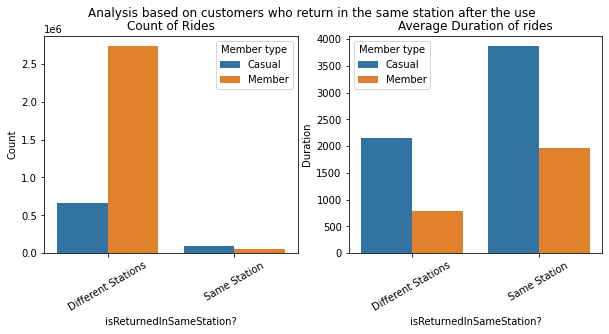

In [19]:
fig, axes = plt.subplots(1, 2,figsize=(10,4))  # create 1*2 plots
fig.suptitle('Analysis based on customers who return in the same station after the use \n') # add title
axes[0].set_title('Count of Rides')  # Add title to the subplot 0
axes[1].set_title('Average Duration of rides')   # Add title to the subplot 1

sns.barplot(ax = axes[0] ,x="isReturnedInSameStation?", y="Count", hue="Member type", data=Stations_df);   # add plot 0
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 30) # rotate axis labels for subplot 0

sns.barplot( ax =axes[1], x="isReturnedInSameStation?", y="Duration", hue="Member type", data = Stations_df_mean);   # add plot 1
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation = 30) # rotate axis labels for subplot 1
plt.show()

# **Inference :**
*  Most people return in different stations after the ride. 
*  The average duration of customers who return in the same station ride for longer durations.



---



# **QUESTIONS:**

The following are the possible hypothesis based on weather and bikeshare data:

*   What parameters of weather impact the rides' count the most?
*   What is the impact?


To answer these questions, we will make use of two datasets: **Weather 2018** and **Capital BikeShare 2018** datasets.

In [20]:
daywise_count = bikeShare_2018.resample('D', on='Start date').size()  # resample the data based on the start date by count

In [21]:
bikeShareCount_vs_Wather = weather_2018[['Temp Avg(° F)','Dew Point Avg(° F)', 'Humidity (%) Avg',  'Wind Speed (mph) Avg', 'Pressure (Hg) Avg', 'Precipitation (in) Total']] # 
bikeShareCount_vs_Wather["RidesCount"] = daywise_count.array   # Add rides count to the new dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


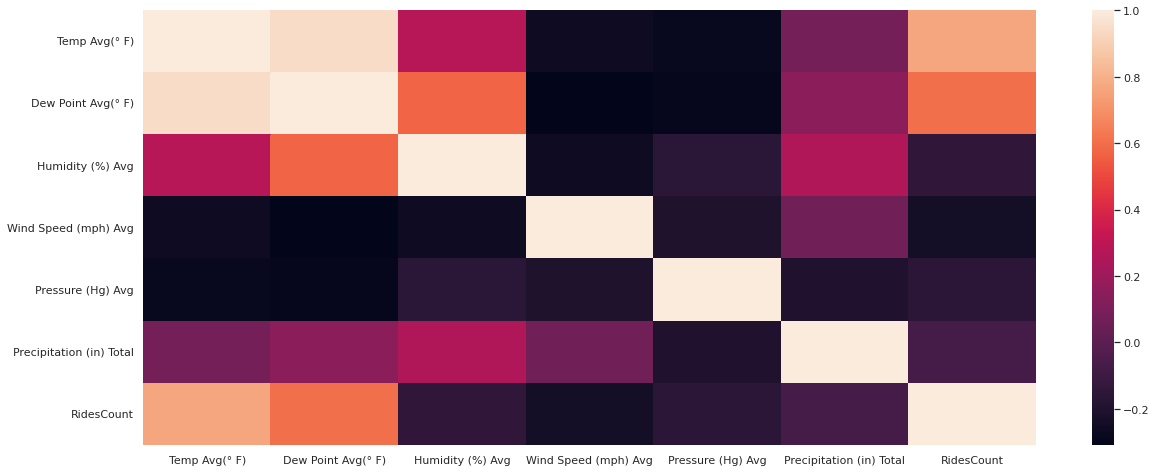

In [49]:
sns.heatmap(bikeShareCount_vs_Wather.corr())   # Create a heatmap for the correlation between weather features and rides count
plt.show()

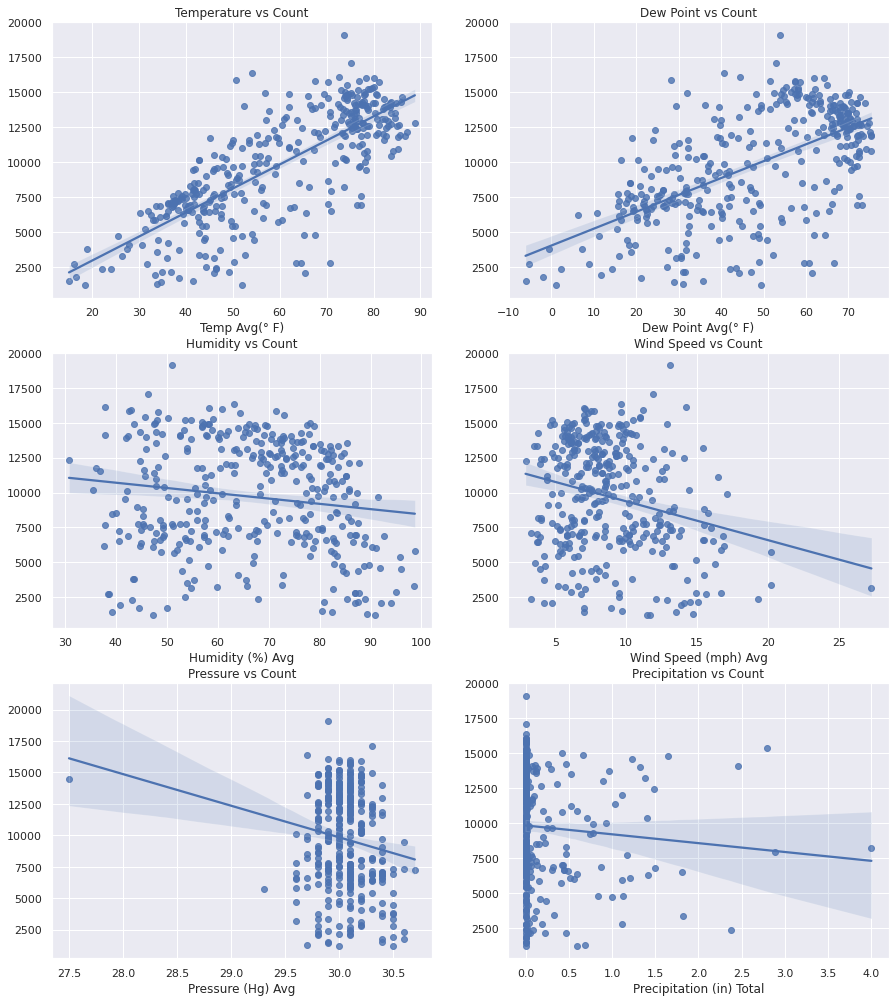

In [53]:
fig, axes = plt.subplots(3,2,figsize=(15,10))   # Create a 3*2 subplots

plt.subplots_adjust(left=None, bottom=0.9, right=None, top=2.2, wspace=None, hspace=None) # add spaces between plots to view plots

axes[0,0].set_title('Temperature vs Count')
sns.regplot(ax = axes[0,0], x=weather_2018["Temp Avg(° F)"], y=daywise_count)

axes[0,1].set_title('Dew Point vs Count')
sns.regplot(ax = axes[0,1], x=weather_2018["Dew Point Avg(° F)"], y=daywise_count)

axes[1,0].set_title('Humidity vs Count')
sns.regplot(ax = axes[1,0], x=weather_2018["Humidity (%) Avg"], y=daywise_count)

axes[1,1].set_title('Wind Speed vs Count')
sns.regplot(ax = axes[1,1], x=weather_2018["Wind Speed (mph) Avg"], y=daywise_count)

axes[2,0].set_title('Pressure vs Count')
sns.regplot(ax = axes[2,0], x=weather_2018["Pressure (Hg) Avg"], y=daywise_count)

axes[2,1].set_title('Precipitation vs Count')
_ = sns.regplot(ax = axes[2,1], x=weather_2018["Precipitation (in) Total"], y=daywise_count)
plt.show()

# **Inference :** 

*   Temperature has most positve correlation with the rides of bikes.
*   Due point has also positive correlation, but the data is more dispered than compared to temperature.
*   Humidity has the least correlation with respect to the count of rides.
*   During the high windspeed the number of rides is very minimal, and viceversa.
*   Pressure and percipitation has almost no impact on the rides count. It is mostly random.



---



# **QUESTIONS:**

There are a few questions that we want to answer using the data. Questions that we think are important are:


*   Are there any days where average rental ride durations are higher than usual? 
*   If so, what could be the reason for these abnormal spikes?

We will see the trend of average ride duration to answer these questions.

In [24]:
daywise_count_mean = bikeShare_2018.resample('D', on='Start date').mean().reset_index()   # resample the data based on the start date by average duration

In [25]:
# Create a lineplot with onhover feature
import plotly.express as px

fig = px.line(daywise_count_mean, x="Start date", y="Duration", title="Trend of average ride duration from Jan 2018 through Dec 2018") # create the plot
fig.update_traces(mode="markers+lines") # add markers

fig.show() # display plot

In [26]:
daywise_count_mean.sort_values('Duration',ascending = False).head(5) #Top 5 days with highest average duration

Start date     Duration  Start station number  End station number
103 2018-04-14  2063.369801          31315.121017        31313.846126
146 2018-05-27  1947.390782          31309.025744        31308.497919
89  2018-03-31  1924.541199          31309.096258        31304.398639
184 2018-07-04  1892.190535          31309.265918        31309.941164
358 2018-12-25  1809.150229          31321.913991        31310.227064

# **ANSWERS:**

*   Yes, there are few days where bike ride durations are longer than usual.
*   The days where rides were taken long were:
          
   *  March 31 - Easter Saturday 
   *  April 14 - Cherry Bloosom Festival in DC ( a very popular event)
   *  May 27 - Willie Nelson(AMerican Singer) Live show
   *  July 4 - United States Independence
   *  December 25 - Christmas
         
          












---



# **Question:**
What day and what time of the day sees more traffic in terms of bike rentals?

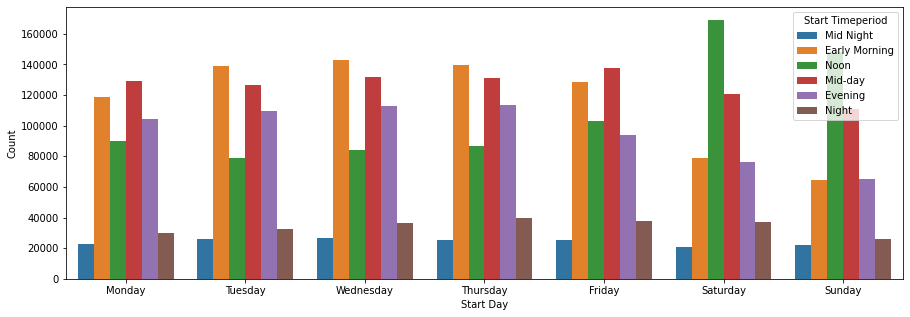

In [27]:
timeperiodwise_df = bikeShare_2018.groupby(['Start Day','Start Timeperiod']).size().to_frame().reset_index()
timeperiodwise_df.columns = ["Start Day","Start Timeperiod","Count"]


fig, ax = plt.subplots(figsize=(15,5))
sns.barplot( ax=ax, x="Start Day", y="Count", hue="Start Timeperiod", data=timeperiodwise_df);

# **Answer:**
It is very clear from the above viz that **afternoons on weekends** have more no.of bike rentals than any other day of the week.



---



# **HYPOTHESIS:**

It is our hypothesis that bike rentals increase in the **SUMMER** season due to the desired weather conditions in the season. Considering our hypothesis to be correct, we also assume that there is a spike in the traffic at each of these bike rental stations. Due to the sheer volume of data and stations, we will be only considering top 10 stations based on total no.of rides to prove our hypothesis.

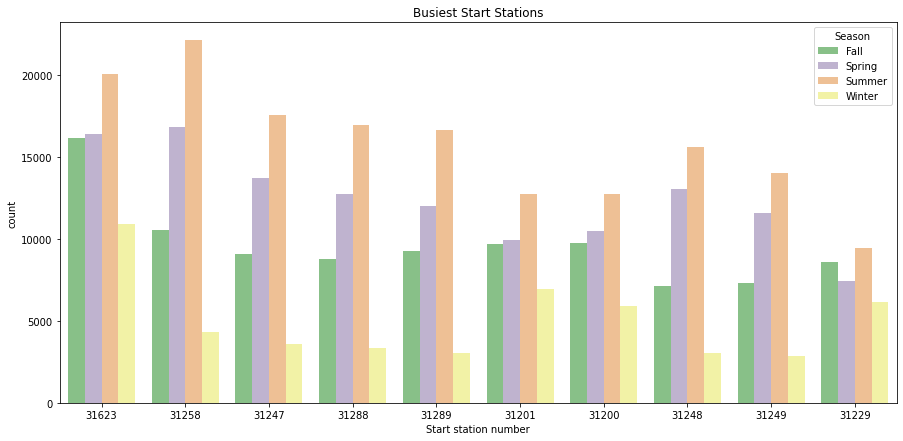

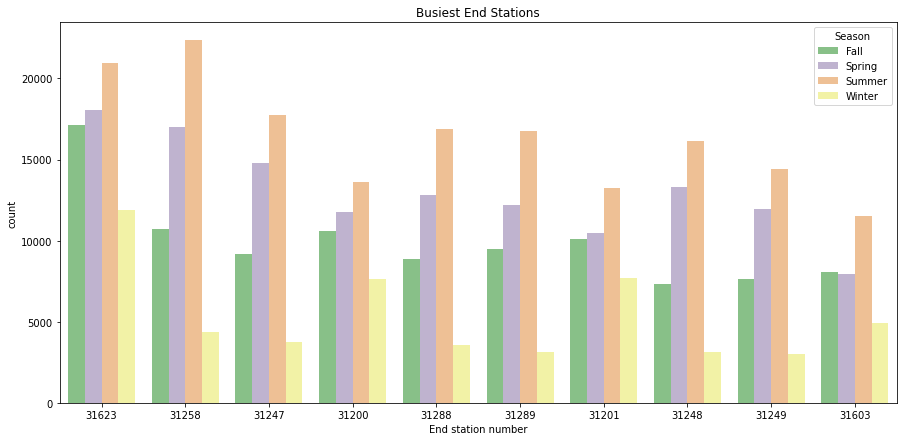

In [28]:
# Plotting top 10 Busiest Start and End Station based on total no.of rides that start and end at these stations along with the season wise distribution.

plt.figure(1, figsize=(15, 7))
plt.title("Busiest Start Stations")
sns.countplot(x = "Start station number",hue='Season',order=bikeShare_2018['Start station number'].value_counts().index[0:10],data=bikeShare_2018,palette='Accent')
plt.show()

plt.figure(1, figsize=(15, 7))
plt.title("Busiest End Stations")
sns.countplot(x = "End station number",hue='Season', order=bikeShare_2018['End station number'].value_counts().index[0:10],data=bikeShare_2018,palette='Accent')
plt.show()

# **INFERENCE:**
As we can see in the above graph, the total no.of rides increase in the Summer season. Also, the traffic at each bike rental station experiences heavy traffic during this season. Therefore, our hypothesis is correct.



---



# **BIKE STATIONS and ROUTE POPULARITY**
Now that we have dealed with temporal data in the dataset, let's move on to the spatial data. Here the hypothesis is that we may have some source stations that are more popular than others. Same can be inferred about the end stations. But instead of looking at source and destination stations independently, we think it will be better to observe the routes and their popularity directly. For this we first need to extract routes, then count the occurrences of each of these routes. Once we have done that, we will be able to proceed further.

In [30]:
# Calculating popularity of unique routes based on their frequency/occurrences.
bikeShare_2018['Route'] = bikeShare_2018['Start station number'].astype(str) + "-" + bikeShare_2018['End station number'].astype(str)     # A column which holds the ride's route
route_freq_df = bikeShare_2018.Route.value_counts().reset_index(name='Route_Freq').rename(columns={'index': 'Route'})                     # Frequency count of each unique route
bikeShare_2018 = pd.merge(bikeShare_2018,route_freq_df, on = "Route")                                                                     # Merging two data frames to get data in desired format 


Now that we have all routes and their frequencies with us, it makes sense to make a new data frame which holds everything we need related to route specific data. 

In [31]:
# Here we add and map features from our main data frame to the route specific data frame.

# Temporary df to hold the data. Extracting Route and Duration from the main data frame.
duration_df = bikeShare_2018[['Duration', 'Route']]
duration_df= duration_df.groupby('Route', as_index=False)['Duration'].mean()

# Merging season information to the route specific data frame
duration_df_1 = bikeShare_2018[['Duration', 'Route', 'Season']]
duration_df_1 = duration_df_1.groupby(['Route', 'Season'], as_index=False)['Duration'].mean()

# Making a copy
temp = duration_df_1.copy()

# Merging Average Duration in Fall season for every route
temp1 = temp.loc[temp['Season'] == "Fall"]
temp1.drop('Season',axis=1, inplace=True)
temp1.rename({'Duration':'Fall_Duration'},axis=1, inplace=True)
temp1['Fall_Duration'] = temp1['Fall_Duration'].fillna(0)

# Merging Average Duration in Winter season for every route
temp2 = temp.loc[temp['Season'] == "Winter"]
temp2.drop('Season',axis=1, inplace=True)
temp2.rename({'Duration':'Winter_Duration'},axis=1, inplace=True)
temp2['Winter_Duration'] = temp2['Winter_Duration'].fillna(0)
temp1 = pd.merge(temp1, temp2, on = 'Route')

# Merging Average Duration in Spring season for every route
temp3 = temp.loc[temp['Season'] == "Spring"]
temp3.drop('Season',axis=1, inplace=True)
temp3.rename({'Duration':'Spring_Duration'},axis=1, inplace=True)
temp3['Spring_Duration'] = temp3['Spring_Duration'].fillna(0)
temp1 = pd.merge(temp1, temp3, on = 'Route')

# Merging Average Duration in Summer season for every route
temp4 = temp.loc[temp['Season'] == "Summer"]
temp4.drop('Season',axis=1, inplace=True)
temp4.rename({'Duration':'Summer_Duration'},axis=1, inplace=True)
temp4['Summer_Duration'] = temp4['Summer_Duration'].fillna(0)
temp1 = pd.merge(temp1, temp4, on = 'Route')


duration_df = pd.merge(duration_df, temp1, on='Route')   # Merging season specific duration witht the temporary dataframe
del [temp1,temp2,temp3,temp4]     # Deleting all temporary dataframe to save memory.

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykerne

In [32]:
# Getting start station and end station number of the route in the data frame
route_freq_df['Start station number'] = route_freq_df['Route'].str[:5]
route_freq_df['End station number'] = route_freq_df['Route'].str[-5:] 

# Merging route specific data frame with the temporary data frame
route_freq_df = pd.merge(route_freq_df, duration_df, on= 'Route')

In [33]:
# Getting station names in the data frame. We need station names to get their geo location from another data set(station_info)

# For Start station 
temp_df = bikeShare_2018[['Start station number', 'Start station']]
temp_df = temp_df.drop_duplicates()
temp_df['Start station number'] = temp_df['Start station number'].astype(int)
route_freq_df['Start station number'] = route_freq_df['Start station number'].astype(int)
route_freq_df = pd.merge(route_freq_df, temp_df, on = "Start station number")

# For End station
temp_df = bikeShare_2018[['End station number', 'End station']]
temp_df = temp_df.drop_duplicates()
temp_df['End station number'] = temp_df['End station number'].astype(int)
route_freq_df['End station number'] = route_freq_df['End station number'].astype(int)
route_freq_df = pd.merge(route_freq_df, temp_df, on = "End station number")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
'''
Now that we have station's name and number. Its time to get their geo-location (latitude and longitude).
We query station_info dataset to get this information.
'''

station_info.rename({"name":"Start station"}, axis=1, inplace = True)                                           # Renaming name column in station info
route_freq_df = pd.merge(route_freq_df, station_info[['Start station','lat','lon']], on = "Start station")      # Querying and getting start station's lat and lon
station_info.rename({"Start station":"End station"}, axis=1, inplace = True)                                    # Renaming name column in station info
route_freq_df = pd.merge(route_freq_df, station_info[['End station','lat','lon']], on = "End station")          # Querying and getting end station's lat and lon

In [35]:
# Renaming few columns and sorting the data in descending order of the route freq.

route_freq_df.rename({'lat_x': 'Start_lat', 'lon_x': 'Start_lon', 'lat_y': 'End_lat', 'lon_y': 'End_lon'}, axis=1, inplace= True)
route_freq_df.sort_values("Route_Freq", ascending= False, inplace= True)

# **Finally, our Route specific data frame is ready.**

In [36]:
route_freq_df

Route  Route_Freq  ...    End_lat    End_lon
0      31248-31248        6339  ...  38.888774 -77.028694
1634   31258-31249        5661  ...  38.879819 -77.037413
832    31247-31247        5566  ...  38.888553 -77.032427
1117   31288-31288        4689  ...  38.890496 -77.017246
276    31247-31258        4555  ...  38.888255 -77.049436
...            ...         ...  ...        ...        ...
44321  31106-31523           1  ...  38.915000 -77.007800
44340  31211-31523           1  ...  38.915000 -77.007800
44341  31297-31523           1  ...  38.915000 -77.007800
7221   32043-31108           1  ...  38.876697 -77.017898
41360  31000-31296           1  ...  38.924088 -77.040787

[58143 rows x 15 columns]

So, we now have a data frame which holds all unique routes and its information like frequency, start station, end station etc. We will plot this information on map and try to gain insights



---



In [37]:
import folium                           # Mapping application
from folium import plugins              # Used to plot routes on a map

folium_map = folium.Map(location = [38.888774, -77.028694], zoom_start=13, tiles="cartodbpositron")
folium_map_start = folium.Map(location = [38.888774, -77.028694], zoom_start=12, tiles="cartodbpositron")
folium_map_end = folium.Map(location = [38.888774, -77.028694], zoom_start=12, tiles="cartodbpositron",control_scale=True)

coords = []

for index,row in route_freq_df.head(1000).iterrows():
  
  folium.CircleMarker(location=(row['Start_lat'], row['Start_lon']), color='#0A8A9F', radius= (row['Duration']/1000), weight= (row['Route_Freq']/500) , fill=True).add_child(folium.Popup(row['Start station'] + ". Frequency: "+ str(row['Route_Freq']) + " . Avg. Duration: " + str(row['Duration'])[0:7])).add_to(folium_map_start)

  folium.CircleMarker(location=(row['End_lat'], row['End_lon']), color='#f68e56', radius= (row['Duration']/1000), weight= (row['Route_Freq']/500) , fill=True).add_child(folium.Popup(row['End station']  + ". Frequency: " + str(row['Route_Freq'])  + " . Avg. Duration: " + str(row['Duration'])[0:7])).add_to(folium_map_end)


# **Popular Start Stations based on *Frequency* and *Average Duration*.**
Each circle represents a start station and has two important features: Radius and Color.

**Radius:**
Radius of the circle represents **Average Duration** of the rides that start from a particular station.
Therefore, greater the radius, greater is the average duration of the rides from that station.

**Color:**
Brighter the circle, higher is the **total number of rides** that start from a particular station.

Click on the circle to gain more information.

In [38]:
folium_map_start

# **Inference:**
1. This map helps us understand the popularity and distribution of bike rental stations across the region.
2. Most Popular Start Stations with higher Average Ride Durations are:

    *   Jefferson Dr & 14th St.
    *   Smithsonian-National Mall / Jefferson Dr & 12th St.
    *   4th St & Madison Dr NW.
3. These insights would help business understand their customer behavior and help them make strategies to empower their business.





   



---



# **Popular End Station based on *Frequency* and *Average Duration*.**

Each circle represents an end station and has two important features: Radius and Color.

**Radius:**
Radius of the circle represents **Average Duration** of the rides that end at a particular station.
Therefore, greater the radius, greater is the average duration of the rides that end at a particular station.

**Color:**
Brighter the circle, higher is the **total number of rides** that end at a particular station.

Click on the circle to gain more information.
Each circle represents an end station. Brighter the color, higher is the popularity.

In [39]:
folium_map_end

# **Popular Routes based on frequency**
Now that we have seen popular start and end station individually, we can proceed to find insights on popular routes.
Due to the sheer volume of data, we will be considering only **top 100 routes** based on popularity for our analysis going ahead.

In [40]:
'''
In order to plot routes on map, we need to find direction between two points that needs to be plot. 
This code block helps us navigate path between any two points.
We make use of OpenRouteService API to get directions.
Please let us know if the API key is no longer valid.
'''
!pip install geopy
!pip install openrouteservice
import openrouteservice                 
from openrouteservice import convert
from geopy.geocoders import Nominatim   
import geopy.distance
import requests                 

api_key = '5b3ce3597851110001cf624865cc2c55e4904bd28030e059ac74769b';
path_list = []

for index,row in route_freq_df.head(100).iterrows():
  folium.CircleMarker(location=(row['Start_lat'], row['Start_lon']), color='#0A8A9F', radius=5, weight= (row['Route_Freq']/500) , fill=True).add_child(folium.Popup(row['Start station'] + ": "+ str(row['Route_Freq']))).add_to(folium_map)
  folium.CircleMarker(location=(row['End_lat'], row['End_lon']), color='#f68e56', radius=5, weight= (row['Route_Freq']/500) , fill=True).add_child(folium.Popup(row['End station'] + ": "+ str(row['Route_Freq']))).add_to(folium_map)

  try:
    coords = ((row['Start_lon'],row['Start_lat']),(row['End_lon'],row['End_lat']))
    client = openrouteservice.Client(key=api_key) 
    geometry = client.directions(coords)['routes'][0]['geometry']
    decoded = convert.decode_polyline(geometry)
              
              
    reverse = [(y, x) for x, y in decoded['coordinates']]        
              
              
    path_list.append(reverse)
              
  except:
    pass


/usr/local/lib/python3.7/dist-packages/openrouteservice/client.py:214: UserWarning:

Rate limit exceeded. Retrying for the 1st time.

/usr/local/lib/python3.7/dist-packages/openrouteservice/client.py:214: UserWarning:

Rate limit exceeded. Retrying for the 2nd time.

/usr/local/lib/python3.7/dist-packages/openrouteservice/client.py:214: UserWarning:

Rate limit exceeded. Retrying for the 3rd time.

/usr/local/lib/python3.7/dist-packages/openrouteservice/client.py:214: UserWarning:

Rate limit exceeded. Retrying for the 4th time.

/usr/local/lib/python3.7/dist-packages/openrouteservice/client.py:214: UserWarning:

Rate limit exceeded. Retrying for the 5th time.

/usr/local/lib/python3.7/dist-packages/openrouteservice/client.py:214: UserWarning:

Rate limit exceeded. Retrying for the 6th time.

/usr/local/lib/python3.7/dist-packages/openrouteservice/client.py:214: UserWarning:

Rate limit exceeded. Retrying for the 7th time.

/usr/local/lib/python3.7/dist-packages/openrouteservice/client

# **Most Popular Routes**

The following graph shows us top start-end station pairs used by commuters.

In [41]:
for path in path_list:
        line = folium.PolyLine(path, weight=1, color='#0A8A9F').add_to(folium_map)
    

folium_map



---

---





# **DATA MODELING**
In this section we will be building a model using Decision Trees. We will compare the performance of the model on both the training and testing data. The agenda behind building a model is to identify patterns in the dataset.
For this purpose, we will try to build a model which will be able to **predict** an important feature in our dataset - **Type of User (Member or Casual)** - based on other features.

In [42]:
'''
Selecting important features from our dataset from modeling point of view.
'''
model_Data = bikeShare_2018[['Duration', 'Start station', 'End station', 'Member type', 'Start Day', 'Start Month']]
model_Data

Duration                  Start station  ...  Start Day Start Month
0             552    Adams Mill & Columbia Rd NW  ...     Monday     January
1            1243    Adams Mill & Columbia Rd NW  ...   Saturday     January
2             745    Adams Mill & Columbia Rd NW  ...   Saturday     January
3             974    Adams Mill & Columbia Rd NW  ...  Wednesday     January
4             606    Adams Mill & Columbia Rd NW  ...   Thursday     January
...           ...                            ...  ...        ...         ...
3542679      1111  Potomac & Pennsylvania Ave SE  ...     Monday    December
3542680       282       New Jersey Ave & F St NW  ...     Monday    December
3542681       671          USDA / 12th & C St SW  ...     Monday    December
3542682       587            39th & Veazey St NW  ...     Monday    December
3542683      1175  21st St & Constitution Ave NW  ...     Monday    December

[3542684 rows x 6 columns]

As we can see, we already have clean data for training the model. But, before we do that, we need to **transform** features in our dataset from **categorical to numerical features** (so that DecisionTrees can be build using skelearn).
We will be using **One-hot-encoding** and **Count Frequency enconding** techniques to transform our features.

In [43]:
# Transforming Categorical Features to Numerical Features.

transform = model_Data[['Start station', 'End station', 'Member type', 'Start Day', 'Start Month']]
transform.rename({'Start station': 'SS', 'End station': 'ES', 'Member type': 'Member', 'Start Day': 'Day', 'Start Month': 'Month'}, axis= 1, inplace=True)  # Renaming features for ease.

'''
Start Station and End Station are categorical features with very high cardinality.
Therefore, using one-hot-encoding on these features would not be the best choice.
Hence, we are using Count Frequency Encoding to transform these features from Categorical to Numerical Features.

'''

# Using Count Frequency Encoding technique to transform Start Station feature from Categorical to Numerical feature
SS_dict = transform.SS.value_counts().to_dict()
transform.SS = transform.SS.map(SS_dict)

# Using Count Frequency Encoding technique to transform End Station feature from Categorical to Numerical feature
ES_dict = transform.ES.value_counts().to_dict()
transform.ES = transform.ES.map(ES_dict)


# Feature Member has low cardinality. Therefore, using one-hot-encoding for transformation
df = pd.get_dummies(transform[['Member','Day', 'Month']], prefix='Member')
transform = pd.concat([transform, df], axis=1)
transform.drop('Member', axis=1, inplace=True)

# Making our modeling dataset ready to use
model_Data = pd.concat([model_Data, transform], axis=1)
model_Data.drop(['Start station', 'End station', 'Member type', 'Start Day', 'Start Month', 'Day', "Month"], axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
model_Data

Duration     SS  ...  Member_November  Member_December
0             552  18538  ...                0                0
1            1243  18538  ...                0                0
2             745  18538  ...                0                0
3             974  18538  ...                0                0
4             606  18538  ...                0                0
...           ...    ...  ...              ...              ...
3542679      1111   8833  ...                0                1
3542680       282    235  ...                0                1
3542681       671  11731  ...                0                1
3542682       587   3975  ...                0                1
3542683      1175   7739  ...                0                1

[3542684 rows x 24 columns]

**Modeling Data is ready to use.** We can therefore begin training our model. And for that we will first split our dataset into training and testing dataset.


In [45]:
from sklearn.model_selection import train_test_split

X = model_Data.drop(['Member_Casual', 'Member_Member'],axis=1)             # Dropping the target feature from non-target data
y = model_Data[['Member_Casual']]                       # Target Feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42) 

In [46]:
from sklearn.tree import DecisionTreeClassifier

# Building a Decision Tree on training datasets
clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=12, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=5, random_state=42)

In [47]:
# Since the model is now ready, we can try predicting target feature on testing data and evalutating the accuracy
y_predict = clf_model.predict(X_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(str(accuracy_score(y_test,y_predict) *100 ) + ' %')

84.92076634870334 %


Fortunately, accuracy is calculated to be around **85%** (at the time writing this code). Which is amazing!
This basically means there are patterns in the data and the model is able to identify it and therefore predict the target feature with 85% accuracy.



---



# **Business Take-Homes from our analysis.**


1. Member type (registered users) of users have more no.of rides as compared to Casual members. However, average duration of member type of users is lower than that of Casual Members. We suggest that promotional offers can be given to member type of users on longer duration rental rides to increase business.

2. As mentioned earlier, the count of no.of rides by casual members is comparitively lower than Member type of users. We think, some offers like giving casual members a free ride after a certain no.of rides who help attract casual type of members.

3. Winter months experiences low user traffic and therefore, having more offers in these months would attract more users.

4. Same is the case on Weekend Mornings. Therefore, more promotinal offers can be provided in these months. 